In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [ ]:
# colors = ['steelblue','orchid','darkorange']
# colors_n = ['mediumseagreen','deeppink','dodgerblue','blueviolet']

In [2]:
metadata = pd.read_csv('../empirical/subsampling_vF/metadata/metadata_cleaned_wes.csv')
metadata

,id,whitebritish,used_in_pca,birth_east_coord,birth_north_coord,assessment_center,birth_UKelsewhere,PC1,PC2,PC3,...,within_5epsilon_pca,within_10epsilon_pca,within_50epsilon_pca,within_100epsilon_pca,closest_10k_pca,distance_to_centroid_geo,closest_10k_geo,within_5epsilon_geo,within_10epsilon_geo,within_50epsilon_geo
0,1000224,1.0,1.0,435500.0,387500.0,Sheffield,England,0.000420,-0.000268,0.000011,...,True,True,True,True,False,18384.776311,False,True,True,True
1,1000477,1.0,1.0,457500.0,402500.0,Sheffield,England,0.000341,-0.000285,0.000181,...,True,True,True,True,False,44777.226354,False,True,True,True
2,1000482,0.0,1.0,337500.0,391500.0,Liverpool,England,-0.000078,0.000076,-0.001317,...,True,True,True,True,False,81743.501271,False,False,True,True
3,1000568,1.0,1.0,369500.0,422500.0,Bury,England,0.000401,-0.000159,0.000173,...,True,True,True,True,False,64536.811201,False,False,True,True
4,1000656,1.0,1.0,409500.0,287500.0,Birmingham,England,0.000374,-0.000130,-0.000102,...,True,True,True,True,False,93434.469014,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469771,6023516,1.0,0.0,459500.0,451500.0,Reading,England,NaN,NaN,NaN,...,True,True,True,True,False,81987.803971,False,False,True,True
469772,6023584,1.0,1.0,456500.0,341500.0,Nottingham,England,0.000330,-0.000124,0.000196,...,True,True,True,True,False,54451.813560,False,False,True,True
469773,6023595,1.0,1.0,286500.0,378500.0,Bristol,Wales,0.000274,-0.000246,0.000293,...,True,True,True,True,False,132015.150646,False,False,False,True
469774,6023625,1.0,1.0,444500.0,541500.0,Middlesborough,England,0.000403,-0.000168,0.000131,...,True,True,True,True,False,163085.866954,False,False,False,True


In [4]:
# sfs_unif = pd.read_csv('../empirical/subsampling_vF/results/sfs/uniform_n10000_all.tsv',delimiter='\t')
# sfs_10k = pd.read_csv('../empirical/subsampling_vF/results/sfs/closest10kpca_n10000_all.tsv',delimiter='\t')
# sfs_5eps = pd.read_csv('../empirical/subsampling_vF/results/sfs/5epsilonpca_n10000_all.tsv',delimiter='\t')
# sfs_10eps = pd.read_csv('../empirical/subsampling_vF/results/sfs/10epsilonpca_n10000_all.tsv',delimiter='\t')
# sfs_50eps = pd.read_csv('../empirical/subsampling_vF/results/sfs/50epsilonpca_n10000_all.tsv',delimiter='\t')
# sfs_100eps = pd.read_csv('../empirical/subsampling_vF/results/sfs/100epsilonpca_n10000_all.tsv',delimiter='\t')

# sfs_unif_LoF = pd.read_csv('../empirical/subsampling_vF/results/sfs/uniform_n10000_LoF.tsv',delimiter='\t')
# sfs_10k_LoF = pd.read_csv('../empirical/subsampling_vF/results/sfs/closest10kpca_n10000_LoF.tsv',delimiter='\t')
# sfs_5eps_LoF = pd.read_csv('../empirical/subsampling_vF/results/sfs/5epsilonpca_n10000_LoF.tsv',delimiter='\t')
# sfs_10eps_LoF = pd.read_csv('../empirical/subsampling_vF/results/sfs/10epsilonpca_n10000_LoF.tsv',delimiter='\t')
# sfs_50eps_LoF = pd.read_csv('../empirical/subsampling_vF/results/sfs/50epsilonpca_n10000_LoF.tsv',delimiter='\t')
# sfs_100eps_LoF = pd.read_csv('../empirical/subsampling_vF/results/sfs/100epsilonpca_n10000_LoF.tsv',delimiter='\t')


In [3]:
stats_unif = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/uniformpcaIS_n10000_all.tsv',delimiter='\t')
stats_10k = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/closest10kpca_n10000_all.tsv',delimiter='\t')
stats_5eps = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/5epsilonpcaIS_n10000_all.tsv',delimiter='\t')
stats_10eps = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/10epsilonpcaIS_n10000_all.tsv',delimiter='\t')
stats_50eps = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/50epsilonpcaIS_n10000_all.tsv',delimiter='\t')
stats_100eps = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/100epsilonpcaIS_n10000_all.tsv',delimiter='\t')

In [5]:
stats_100eps

,seed,segsites,monosites,singletons,heterozygosity,af_mean,af_sd,seg_af_mean,seg_af_sd
0,2,3697838,19883447,2172490,0.001874,0.001308,0.019220,0.008872,0.049374
1,3,3678200,19899091,2165044,0.001873,0.001307,0.019217,0.008914,0.049501
2,8,3680043,19897390,2166515,0.001872,0.001307,0.019218,0.008907,0.049486
3,5,3690346,19889197,2168053,0.001873,0.001308,0.019218,0.008886,0.049420
4,10,3694217,19885647,2168291,0.001874,0.001308,0.019217,0.008880,0.049391
5,6,3683214,19894549,2174135,0.001871,0.001306,0.019214,0.008895,0.049459
6,1,3706500,19876490,2180403,0.001874,0.001308,0.019217,0.008849,0.049310
7,4,3673546,19903276,2155361,0.001873,0.001308,0.019219,0.008927,0.049531
8,7,3695843,19886128,2177293,0.001873,0.001307,0.019216,0.008871,0.049381
9,9,3709421,19873412,2178976,0.001875,0.001309,0.019220,0.008845,0.049299


In [6]:
stats_unif_LOF = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/uniformpcaIS_n10000_LOF.tsv',delimiter='\t')
stats_10k_LOF = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/closest10kpca_n10000_LOF.tsv',delimiter='\t')
stats_5eps_LOF = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/5epsilonpcaIS_n10000_LOF.tsv',delimiter='\t')
stats_10eps_LOF = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/10epsilonpcaIS_n10000_LOF.tsv',delimiter='\t')
stats_50eps_LOF = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/50epsilonpcaIS_n10000_LOF.tsv',delimiter='\t')
stats_100eps_LOF = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/100epsilonpcaIS_n10000_LOF.tsv',delimiter='\t')

In [7]:
stats_10k_LOF

,seed,segsites,monosites,singletons,heterozygosity,af_mean,af_sd,seg_af_mean,seg_af_sd
0,8,38579,421719,27351,0.000225,0.000149,0.006001,0.001774,0.020652
1,10,38579,421719,27351,0.000225,0.000149,0.006001,0.001774,0.020652
2,2,38579,421719,27351,0.000225,0.000149,0.006001,0.001774,0.020652
3,9,38579,421719,27351,0.000225,0.000149,0.006001,0.001774,0.020652
4,3,38579,421719,27351,0.000225,0.000149,0.006001,0.001774,0.020652
5,4,38579,421719,27351,0.000225,0.000149,0.006001,0.001774,0.020652
6,7,38579,421719,27351,0.000225,0.000149,0.006001,0.001774,0.020652
7,5,38579,421719,27351,0.000225,0.000149,0.006001,0.001774,0.020652
8,1,38579,421719,27351,0.000225,0.000149,0.006001,0.001774,0.020652
9,6,38579,421719,27351,0.000225,0.000149,0.006001,0.001774,0.020652


In [8]:
stats_10k_geo = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/closest10kgeo_n10000_all.tsv',delimiter='\t')
stats_5eps_geo = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/5epsilongeoIS_n10000_all.tsv',delimiter='\t')
stats_10eps_geo = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/10epsilongeoIS_n10000_all.tsv',delimiter='\t')
stats_50eps_geo = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/50epsilongeoIS_n10000_all.tsv',delimiter='\t')
uniform_geo = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/uniformgeoIS_n10000_all.tsv',delimiter='\t')

stats_10k_geo_LOF = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/closest10kgeo_n10000_LOF.tsv',delimiter='\t')
stats_5eps_geo_LOF = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/5epsilongeoIS_n10000_LOF.tsv',delimiter='\t')
stats_10eps_geo_LOF = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/10epsilongeoIS_n10000_LOF.tsv',delimiter='\t')
stats_50eps_geo_LOF = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/50epsilongeoIS_n10000_LOF.tsv',delimiter='\t')
uniform_geo_LOF = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/uniformgeoIS_n10000_LOF.tsv',delimiter='\t')

In [59]:
ss = []
ss_std = []
af = []
af_std = []
sing = []
sing_std = []
het = []
het_std = []
for df in [stats_10k,stats_5eps,stats_10eps,stats_50eps,stats_100eps,stats_unif]:
    ss.append(df['segsites'].mean())
    ss_std.append(df['segsites'].std())
    af.append(df['seg_af_mean'].mean())
    af_std.append(df['seg_af_mean'].std())
    sing.append(df['singletons'].mean())
    sing_std.append(df['singletons'].std())
    het.append(df['heterozygosity'].mean())
    het_std.append(df['heterozygosity'].std())

labs = ['Closest 10K',r'$w$=5$\varepsilon$',r'$w$=10$\varepsilon$',r'$w$=50$\varepsilon$',r'$w$=100$\varepsilon$','Uniform']

In [66]:
# stats_unif = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/uniform_n10000.tsv',delimiter='\t')
# stats_10k_geo = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/closest10kgeo_n10000_all.tsv',delimiter='\t')
# stats_5eps_geo = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/5epsilongeo_n10000_all.tsv',delimiter='\t')
# stats_10eps_geo = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/10epsilongeo_n10000_all.tsv',delimiter='\t')
# stats_50eps_geo = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/50epsilongeo_n10000_all.tsv',delimiter='\t')
# uniform_geo = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/uniformgeo_n10000_all.tsv',delimiter='\t')
# stats_100eps = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/100epsilonpca_n10000.tsv',delimiter='\t')

ss_geo = []
ss_std_geo = []
af_geo = []
af_std_geo = []
sing_geo = []
sing_std_geo = []
het_geo = []
het_std_geo = []
for df in [stats_10k_geo,stats_5eps_geo,stats_10eps_geo,stats_50eps_geo,uniform_geo]:#,stats_100eps,stats_unif]:
    ss_geo.append(df['segsites'].mean())
    ss_std_geo.append(df['segsites'].std())
    af_geo.append(df['seg_af_mean'].mean())
    af_std_geo.append(df['seg_af_mean'].std())
    sing_geo.append(df['singletons'].mean())
    sing_std_geo.append(df['singletons'].std())
    het_geo.append(df['heterozygosity'].mean())
    het_std_geo.append(df['heterozygosity'].std())


labs_geo = ['Closest 10K',r'$w$=50km',r'$w$=100km',r'$w$=500km','Uniform']#,r'Within 100$\varepsilon_{PCA}$','Uniform']


In [68]:
ss_wlof = []
ss_std_wlof = []
af_wlof = []
af_std_wlof = []
sing_wlof = []
sing_std_wlof = []
het_wlof = []
het_std_wlof = []
for df in [stats_10k,stats_10k_LOF,stats_5eps,stats_5eps_LOF,stats_10eps,stats_10eps_LOF,stats_50eps,stats_50eps_LOF,stats_100eps,stats_100eps_LOF,stats_unif,stats_unif_LOF]:
    ss_wlof.append(df['segsites'].mean())
    ss_std_wlof.append(df['segsites'].std())
    af_wlof.append(df['seg_af_mean'].mean())
    af_std_wlof.append(df['seg_af_mean'].std())
    sing_wlof.append(df['singletons'].mean())
    sing_std_wlof.append(df['singletons'].std())
    het_wlof.append(df['heterozygosity'].mean())
    het_std_wlof.append(df['heterozygosity'].std())

labs_wlof = ['Closest 10K','Closest 10K (LoF)',r'$w$=5$\varepsilon$',r'$w$=5$\varepsilon$ (LoF)',
        r'$w$=10$\varepsilon$',r'$w$=10$\varepsilon$ (LoF)',
        r'$w$=50$\varepsilon$',r'$w$=50$\varepsilon$ (LoF)',
        r'$w$=100$\varepsilon$',r'$w$=100$\varepsilon$ (LoF)',
        'Uniform', 'Uniform (LoF)']

In [69]:
ss_wlof_geo = []
ss_std_wlof_geo = []
af_wlof_geo = []
af_std_wlof_geo = []
sing_wlof_geo = []
sing_std_wlof_geo = []
het_wlof_geo = []
het_std_wlof_geo = []
for df in [stats_10k_geo,stats_10k_geo_LOF,stats_5eps_geo,stats_5eps_geo_LOF,stats_10eps_geo,stats_10eps_geo_LOF,stats_50eps_geo,stats_50eps_geo_LOF,uniform_geo,uniform_geo_LOF]:
    ss_wlof_geo.append(df['segsites'].mean())
    ss_std_wlof_geo.append(df['segsites'].std())
    af_wlof_geo.append(df['seg_af_mean'].mean())
    af_std_wlof_geo.append(df['seg_af_mean'].std())
    sing_wlof_geo.append(df['singletons'].mean())
    sing_std_wlof_geo.append(df['singletons'].std())
    het_wlof_geo.append(df['heterozygosity'].mean())
    het_std_wlof_geo.append(df['heterozygosity'].std())

labs_wlof_geo = ['Closest 10K','Closest 10K (LoF)',r'$w$=50km',r'$w$=50km (LoF)',r'$w$=100km',r'$w$=100km (LoF)',r'$w$= 00km',r'$w$=500km (LoF)','Uniform','Uniform (LoF)']
                 

In [13]:
ss_geo

[2788334.0, 2942851.6, 3055072.0, 3158960.2, 3161856.5]

In [14]:
labs_geo

['Closest 10K', 'Within 50km', 'Within 100km', 'Within 500km', 'Uniform']

In [15]:
colors = ['#1E90FF','#3CB371']
colors = ['#1E90FF','salmon']

In [362]:
# metadata

In [25]:
meta_geo = pd.read_csv('../empirical/subsampling_vF/metadata/metadata_IS_geo.csv')
meta_pca = pd.read_csv('../empirical/subsampling_vF/metadata/metadata_IS_pca.csv')

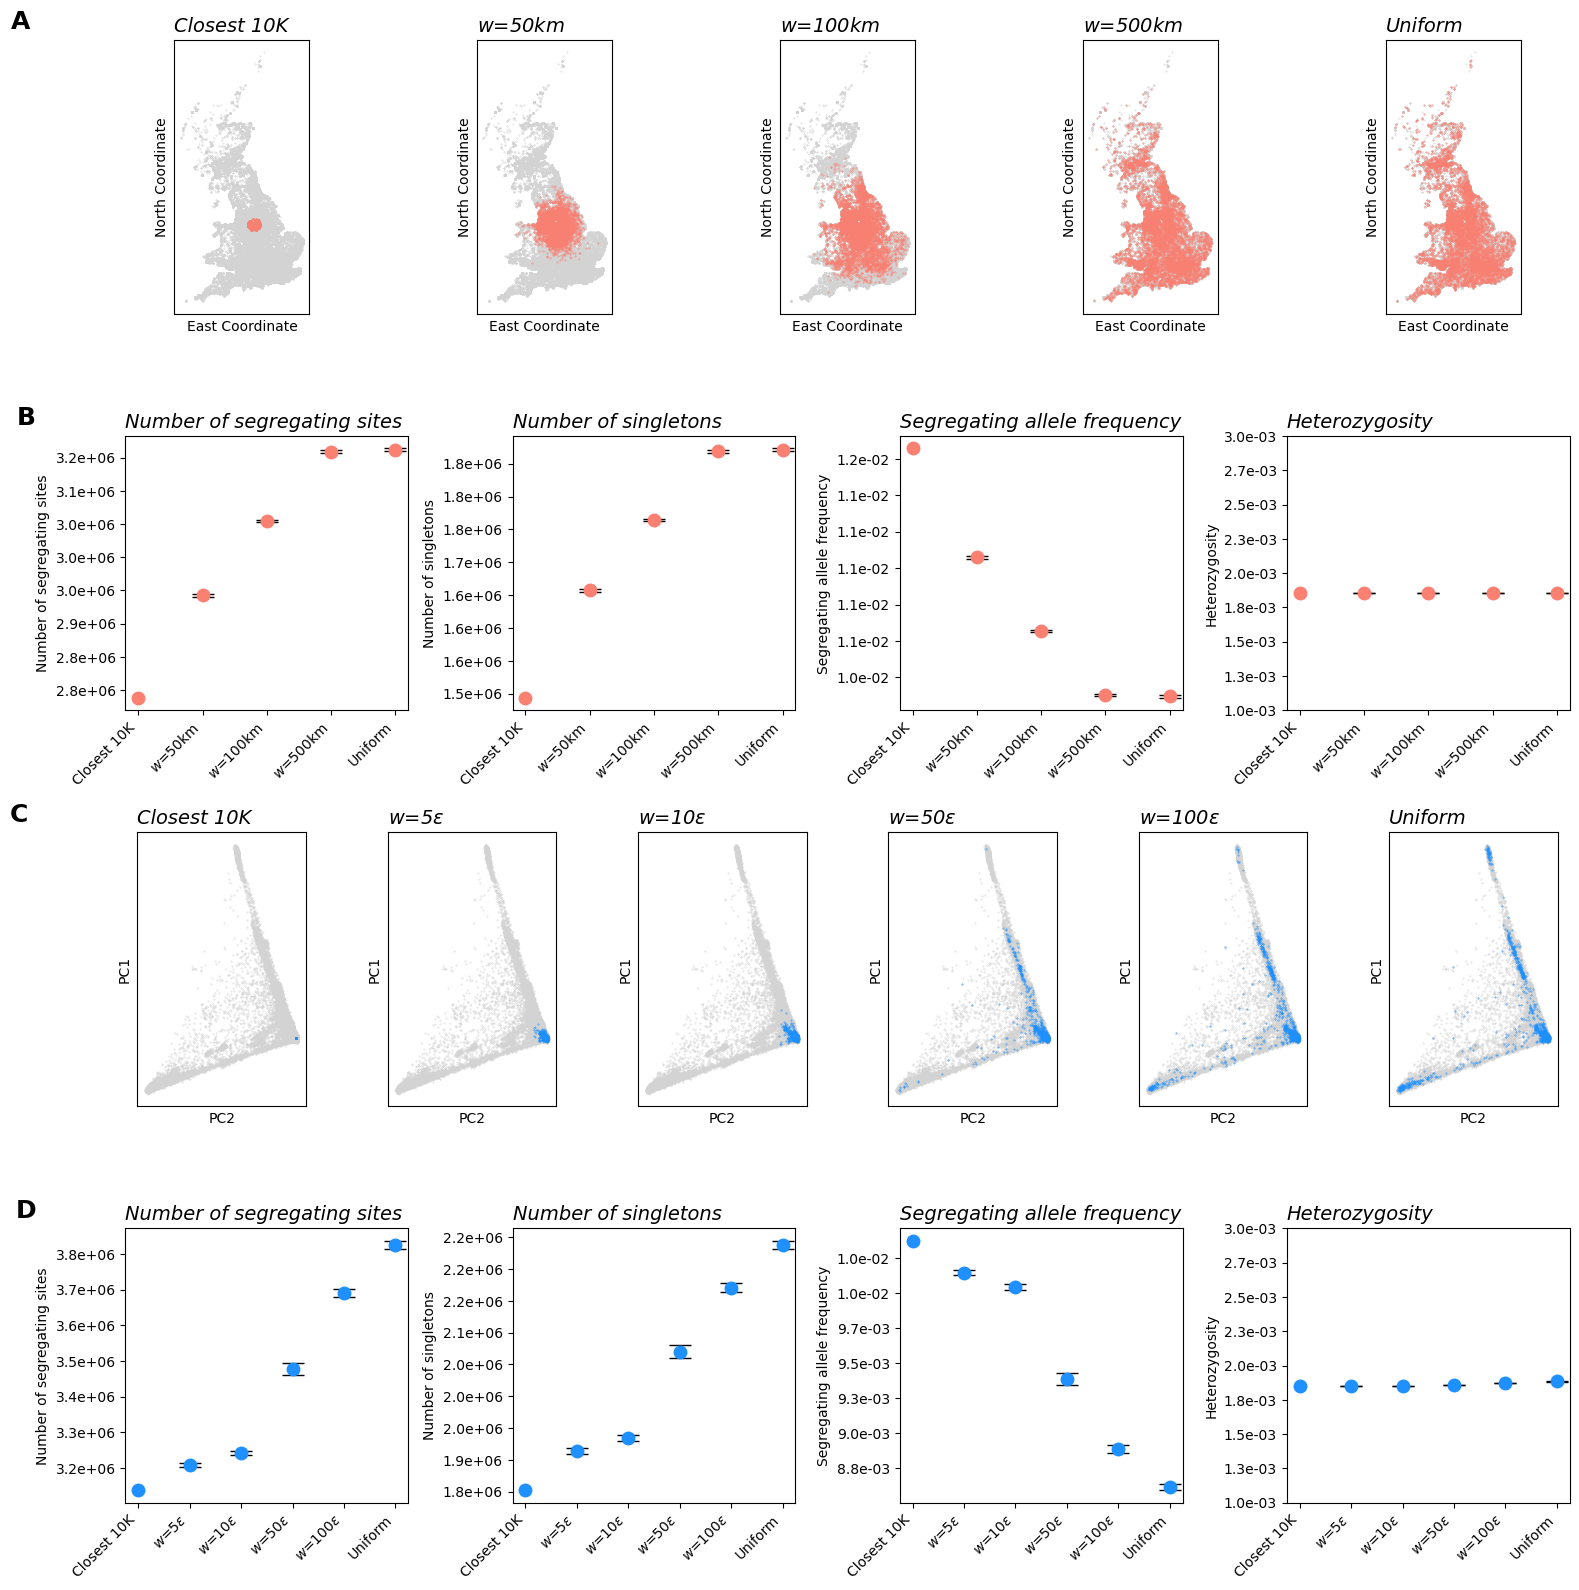

In [60]:
fig = plt.figure(figsize=(16, 16))

gs = gridspec.GridSpec(4, 4, height_ratios=[1, 1, 1, 1])

gs_centered_2 = gridspec.GridSpecFromSubplotSpec(1, 6, subplot_spec=gs[2, 0:4], wspace=0.3)
ax00 = fig.add_subplot(gs_centered_2[0],aspect='equal')
ax0 = fig.add_subplot(gs_centered_2[1],aspect='equal')
ax1 = fig.add_subplot(gs_centered_2[2],aspect='equal')
ax2 = fig.add_subplot(gs_centered_2[3],aspect='equal')
ax3 = fig.add_subplot(gs_centered_2[4],aspect='equal')
ax4 = fig.add_subplot(gs_centered_2[5],aspect='equal')
# ax1 = fig.add_subplot(gs[2, 0])
# ax2 = fig.add_subplot(gs[2, 1])
# ax3 = fig.add_subplot(gs[2, 2])
# ax4 = fig.add_subplot(gs[2, 3])

ax5 = fig.add_subplot(gs[3, 0])
ax6 = fig.add_subplot(gs[3, 1])
ax7 = fig.add_subplot(gs[3, 2])
ax8 = fig.add_subplot(gs[3, 3])

gs_centered = gridspec.GridSpecFromSubplotSpec(1, 5, subplot_spec=gs[0, 0:4], wspace=0.3)
ax9 = fig.add_subplot(gs_centered[1],aspect='equal')
ax10 = fig.add_subplot(gs_centered[2],aspect='equal')
ax11 = fig.add_subplot(gs_centered[3],aspect='equal')
ax16 = fig.add_subplot(gs_centered[0],aspect='equal')
ax17 = fig.add_subplot(gs_centered[4],aspect='equal')

ax12 = fig.add_subplot(gs[1, 0])
ax13 = fig.add_subplot(gs[1, 1])
ax14 = fig.add_subplot(gs[1, 2])
ax15 = fig.add_subplot(gs[1, 3])


# meta_sub = metadata[metadata['within_5epsilon_pca']==False]
# ax1.scatter(meta_sub['PC1'],meta_sub['PC2'],s=0.1,c='lightgray')
# meta_sub = metadata[metadata['within_5epsilon_pca']==True]
# ax1.scatter(meta_sub['PC1'],meta_sub['PC2'],s=0.1,c=colors[0])
ax00.scatter(meta_pca['PC1'],meta_pca['PC2'],s=0.1,c='lightgray')
df = pd.read_csv('../empirical/subsampling_vF/data/id_lists/closest10kpca_seed1_n10000.tsv',delimiter='\t')
df.rename(columns={'X1': 'id'}, inplace=True)
meta_sub = pd.merge(meta_pca, df, on=['id'], how='inner')
ax00.scatter(meta_sub['PC1'],meta_sub['PC2'],s=0.1,c=colors[0])
ax00.set_xticks([])
ax00.set_yticks([])
ax00.set_xticklabels([])
ax00.set_yticklabels([])
ax00.set_ylabel('PC1')
ax00.set_xlabel('PC2')
ax00.set_title(r'Closest 10K',loc='left',fontstyle='italic',fontsize=14)

ax0.scatter(meta_pca['PC1'],meta_pca['PC2'],s=0.1,c='lightgray')
df = pd.read_csv('../empirical/subsampling_vF/data/id_lists/5epsilonpcaIS_seed0_n10000.tsv',delimiter='\t')
df.rename(columns={'X1': 'id'}, inplace=True)
meta_sub = pd.merge(meta_pca, df, on=['id'], how='inner')
ax0.scatter(meta_sub['PC1'],meta_sub['PC2'],s=0.1,c=colors[0])
ax0.set_xticks([])
ax0.set_yticks([])
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.set_ylabel('PC1')
ax0.set_xlabel('PC2')
ax0.set_title(r'$w$=5$\varepsilon$',loc='left',fontstyle='italic',fontsize=14)

# meta_sub = metadata[metadata['within_10epsilon_pca']==False]
# ax2.scatter(meta_sub['PC1'],meta_sub['PC2'],s=0.1,c='lightgray')
# meta_sub = metadata[metadata['within_10epsilon_pca']==True]
# ax2.scatter(meta_sub['PC1'],meta_sub['PC2'],s=0.1,c=colors[0])
ax1.scatter(meta_pca['PC1'],meta_pca['PC2'],s=0.1,c='lightgray')
df = pd.read_csv('../empirical/subsampling_vF/data/id_lists/10epsilonpcaIS_seed0_n10000.tsv',delimiter='\t')
df.rename(columns={'X1': 'id'}, inplace=True)
meta_sub = pd.merge(meta_pca, df, on=['id'], how='inner')
ax1.scatter(meta_sub['PC1'],meta_sub['PC2'],s=0.1,c=colors[0])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_ylabel('PC1')
ax1.set_xlabel('PC2')
ax1.set_title(r'$w$=10$\varepsilon$',loc='left',fontstyle='italic',fontsize=14)

# meta_sub = metadata[metadata['within_50epsilon_pca']==False]
# ax3.scatter(meta_sub['PC1'],meta_sub['PC2'],s=0.1,c='lightgray')
# meta_sub = metadata[metadata['within_50epsilon_pca']==True]
# ax3.scatter(meta_sub['PC1'],meta_sub['PC2'],s=0.1,c=colors[0])
ax2.scatter(meta_pca['PC1'],meta_pca['PC2'],s=0.1,c='lightgray')
df = pd.read_csv('../empirical/subsampling_vF/data/id_lists/50epsilonpcaIS_seed0_n10000.tsv',delimiter='\t')
df.rename(columns={'X1': 'id'}, inplace=True)
meta_sub = pd.merge(meta_pca, df, on=['id'], how='inner')
ax2.scatter(meta_sub['PC1'],meta_sub['PC2'],s=0.1,c=colors[0])
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_ylabel('PC1')
ax2.set_xlabel('PC2')
ax2.set_title(r'$w$=50$\varepsilon$',loc='left',fontstyle='italic',fontsize=14)

# meta_sub = metadata[metadata['within_100epsilon_pca']==False]
# ax4.scatter(meta_sub['PC1'],meta_sub['PC2'],s=0.1,c='lightgray')
# meta_sub = metadata[metadata['within_100epsilon_pca']==True]
# ax4.scatter(meta_sub['PC1'],meta_sub['PC2'],s=0.1,c=colors[0])
ax3.scatter(meta_pca['PC1'],meta_pca['PC2'],s=0.1,c='lightgray')
df = pd.read_csv('../empirical/subsampling_vF/data/id_lists/100epsilonpcaIS_seed0_n10000.tsv',delimiter='\t')
df.rename(columns={'X1': 'id'}, inplace=True)
meta_sub = pd.merge(meta_pca, df, on=['id'], how='inner')
ax3.scatter(meta_sub['PC1'],meta_sub['PC2'],s=0.1,c=colors[0])
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_ylabel('PC1')
ax3.set_xlabel('PC2')
ax3.set_title(r'$w$=100$\varepsilon$',loc='left',fontstyle='italic',fontsize=14)

ax4.scatter(meta_pca['PC1'],meta_pca['PC2'],s=0.1,c='lightgray')
df = pd.read_csv('../empirical/subsampling_vF/data/id_lists/uniformpcaIS_seed0_n10000.tsv',delimiter='\t')
df.rename(columns={'X1': 'id'}, inplace=True)
meta_sub = pd.merge(meta_pca, df, on=['id'], how='inner')
ax4.scatter(meta_sub['PC1'],meta_sub['PC2'],s=0.1,c=colors[0])
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.set_ylabel('PC1')
ax4.set_xlabel('PC2')
ax4.set_title(r'Uniform',loc='left',fontstyle='italic',fontsize=14)

ax5.plot(labs[0], ss[0], 'o', color=colors[0], markersize=9)
ax5.errorbar(labs[1:], ss[1:], yerr=ss_std[1:], fmt='o', color=colors[0], ecolor='black', capsize=8, markersize=9)
# bars = axs[1,0].bar(labs[0],ss[0],color='steelblue')
# bars = axs[1,0].bar(labs[1:],ss[1:],yerr=ss_std[1:],capsize=5,color='steelblue',ecolor='black')
ax5.set_xticks(labs)
ax5.set_xticklabels(labs, rotation=45, ha='right')
ax5.set_ylabel('Number of segregating sites')
ax5.set_title('Number of segregating sites',loc='left',fontstyle='italic',fontsize=14)
ax5.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1e}'))

ax6.plot(labs[0], sing[0], 'o', color=colors[0], markersize=9)
ax6.errorbar(labs[1:], sing[1:], yerr=sing_std[1:], fmt='o', color=colors[0], ecolor='black', capsize=8, markersize=9)
# bars = axs[1,1].bar(labs[0],sing[0],color='steelblue')
# bars = axs[1,1].bar(labs[1:],sing[1:],yerr=sing_std[1:],capsize=5,color='steelblue',ecolor='black')
ax6.set_xticks(labs)
ax6.set_xticklabels(labs, rotation=45, ha='right')
ax6.set_ylabel('Number of singletons')
ax6.set_title('Number of singletons',loc='left',fontstyle='italic',fontsize=14)
ax6.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1e}'))

ax7.plot(labs[0], af[0], 'o', color=colors[0], markersize=9)
ax7.errorbar(labs[1:], af[1:], yerr=af_std[1:], fmt='o', color=colors[0], ecolor='black', capsize=8, markersize=9)
# bars = axs[1,2].bar(labs[0],af[0],color='steelblue',ecolor='black')
# bars = axs[1,2].bar(labs[1:],af[1:],yerr=af_std[1:],capsize=5,color='steelblue',ecolor='black')
ax7.set_xticks(labs)
ax7.set_xticklabels(labs, rotation=45, ha='right')
ax7.set_ylabel('Segregating allele frequency')
ax7.set_title('Segregating allele frequency',loc='left',fontstyle='italic',fontsize=14)
ax7.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1e}'))

ax8.plot(labs[0], het[0], 'o', color=colors[0], markersize=9)
ax8.errorbar(labs[1:], het[1:], yerr=het_std[1:], fmt='o', color=colors[0], ecolor='black', capsize=8, markersize=9)
# bars = axs[1,3].bar(labs[0],het[0],color='steelblue',ecolor='black')
# bars = axs[1,3].bar(labs[1:],het[1:],yerr=het_std[1:],capsize=5,color='steelblue',ecolor='black')
ax8.set_xticks(labs)
ax8.set_xticklabels(labs, rotation=45, ha='right')
ax8.set_ylabel('Heterozygosity')
ax8.set_title('Heterozygosity',loc='left',fontstyle='italic',fontsize=14)
ax8.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1e}'))
ax8.set_ylim(1e-3,3e-3)


# meta_sub = metadata[metadata['within_5epsilon_geo']==False]
# ax9.scatter(meta_sub['birth_east_coord'],meta_sub['birth_north_coord'],s=0.1,c='lightgray')
# meta_sub = metadata[metadata['within_5epsilon_geo']==True]
# ax9.scatter(meta_sub['birth_east_coord'],meta_sub['birth_north_coord'],s=0.1,c=colors[1])
ax9.scatter(meta_geo['birth_east_coord'],meta_geo['birth_north_coord'],s=0.1,c='lightgray')
df = pd.read_csv('../empirical/subsampling_vF/data/id_lists/5epsilongeoIS_seed0_n10000.tsv',delimiter='\t')
df.rename(columns={'X1': 'id'}, inplace=True)
meta_sub = pd.merge(meta_pca, df, on=['id'], how='inner')
ax9.scatter(meta_sub['birth_east_coord'],meta_sub['birth_north_coord'],s=0.1,c=colors[1])
ax9.set_xticks([])
ax9.set_yticks([])
ax9.set_xticklabels([])
ax9.set_yticklabels([])
ax9.set_ylabel('North Coordinate')
ax9.set_xlabel('East Coordinate')
ax9.set_title(r'$w$=50km',loc='left',fontstyle='italic',fontsize=14)

# meta_sub = metadata[metadata['within_10epsilon_geo']==False]
# ax10.scatter(meta_sub['birth_east_coord'],meta_sub['birth_north_coord'],s=0.1,c='lightgray')
# meta_sub = metadata[metadata['within_10epsilon_geo']==True]
# ax10.scatter(meta_sub['birth_east_coord'],meta_sub['birth_north_coord'],s=0.1,c=colors[1])
ax10.scatter(meta_geo['birth_east_coord'],meta_geo['birth_north_coord'],s=0.1,c='lightgray')
df = pd.read_csv('../empirical/subsampling_vF/data/id_lists/10epsilongeoIS_seed0_n10000.tsv',delimiter='\t')
df.rename(columns={'X1': 'id'}, inplace=True)
meta_sub = pd.merge(meta_pca, df, on=['id'], how='inner')
ax10.scatter(meta_sub['birth_east_coord'],meta_sub['birth_north_coord'],s=0.1,c=colors[1])
ax10.set_xticks([])
ax10.set_yticks([])
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.set_ylabel('North Coordinate')
ax10.set_xlabel('East Coordinate')
ax10.set_title(r'$w$=100km',loc='left',fontstyle='italic',fontsize=14)

# meta_sub = metadata[metadata['within_50epsilon_geo']==False]
# ax11.scatter(meta_sub['birth_east_coord'],meta_sub['birth_north_coord'],s=0.1,c='lightgray')
# meta_sub = metadata[metadata['within_50epsilon_geo']==True]
# ax11.scatter(meta_sub['birth_east_coord'],meta_sub['birth_north_coord'],s=0.1,c=colors[1])
ax11.scatter(meta_geo['birth_east_coord'],meta_geo['birth_north_coord'],s=0.1,c='lightgray')
df = pd.read_csv('../empirical/subsampling_vF/data/id_lists/50epsilongeoIS_seed0_n10000.tsv',delimiter='\t')
df.rename(columns={'X1': 'id'}, inplace=True)
meta_sub = pd.merge(meta_pca, df, on=['id'], how='inner')
ax11.scatter(meta_sub['birth_east_coord'],meta_sub['birth_north_coord'],s=0.1,c=colors[1])
ax11.set_xticks([])
ax11.set_yticks([])
ax11.set_xticklabels([])
ax11.set_yticklabels([])
ax11.set_ylabel('North Coordinate')
ax11.set_xlabel('East Coordinate')
ax11.set_title(r'$w$=500km',loc='left',fontstyle='italic',fontsize=14)


# meta_sub = metadata[metadata['closest_10k_geo']==False]
# ax16.scatter(meta_sub['birth_east_coord'],meta_sub['birth_north_coord'],s=0.1,c='lightgray')
# meta_sub = metadata[metadata['closest_10k_geo']==True]
# ax16.scatter(meta_sub['birth_east_coord'],meta_sub['birth_north_coord'],s=0.1,c=colors[1])
ax16.scatter(meta_geo['birth_east_coord'],meta_geo['birth_north_coord'],s=0.1,c='lightgray')
df = pd.read_csv('../empirical/subsampling_vF/data/id_lists/closest10kgeo_seed1_n10000.tsv',delimiter='\t')
df.rename(columns={'X1': 'id'}, inplace=True)
meta_sub = pd.merge(meta_pca, df, on=['id'], how='inner')
ax16.scatter(meta_sub['birth_east_coord'],meta_sub['birth_north_coord'],s=0.1,c=colors[1])
ax16.set_xticks([])
ax16.set_yticks([])
ax16.set_xticklabels([])
ax16.set_yticklabels([])
ax16.set_ylabel('North Coordinate')
ax16.set_xlabel('East Coordinate')
ax16.set_title(r'Closest 10K',loc='left',fontstyle='italic',fontsize=14)

# meta_sub = metadata[metadata['un']==False]
# ax16.scatter(meta_sub['birth_east_coord'],meta_sub['birth_north_coord'],s=0.1,c='lightgray')
# meta_sub = metadata[metadata['closest_10k_geo']==True]
# ax17.scatter(metadata['birth_east_coord'],metadata['birth_north_coord'],s=0.1,c=colors[1])
ax17.scatter(meta_geo['birth_east_coord'],meta_geo['birth_north_coord'],s=0.1,c='lightgray')
df = pd.read_csv('../empirical/subsampling_vF/data/id_lists/uniformgeoIS_seed0_n10000.tsv',delimiter='\t')
df.rename(columns={'X1': 'id'}, inplace=True)
meta_sub = pd.merge(meta_pca, df, on=['id'], how='inner')
ax17.scatter(meta_sub['birth_east_coord'],meta_sub['birth_north_coord'],s=0.1,c=colors[1])
ax17.set_xticks([])
ax17.set_yticks([])
ax17.set_xticklabels([])
ax17.set_yticklabels([])
ax17.set_ylabel('North Coordinate')
ax17.set_xlabel('East Coordinate')
ax17.set_title(r'Uniform',loc='left',fontstyle='italic',fontsize=14)

ax12.plot(labs_geo[0], ss_geo[0], 'o', color=colors[1], markersize=9)
ax12.errorbar(labs_geo[1:], ss_geo[1:], yerr=ss_std_geo[1:], fmt='o', color=colors[1], ecolor='black', capsize=8, markersize=9)
# bars = axs[1,0].bar(labs[0],ss[0],color='steelblue')
# bars = axs[1,0].bar(labs[1:],ss[1:],yerr=ss_std[1:],capsize=5,color='steelblue',ecolor='black')
ax12.set_xticks(labs_geo)
ax12.set_xticklabels(labs_geo, rotation=45, ha='right')
ax12.set_ylabel('Number of segregating sites')
ax12.set_title('Number of segregating sites',loc='left',fontstyle='italic',fontsize=14)
ax12.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1e}'))

ax13.plot(labs_geo[0], sing_geo[0], 'o', color=colors[1],markersize=9)
ax13.errorbar(labs_geo[1:], sing_geo[1:], yerr=sing_std_geo[1:], fmt='o', color=colors[1], ecolor='black', capsize=8, markersize=9)
# bars = axs[1,1].bar(labs[0],sing[0],color='steelblue')
# bars = axs[1,1].bar(labs[1:],sing[1:],yerr=sing_std[1:],capsize=5,color='steelblue',ecolor='black')
ax13.set_xticks(labs_geo)
ax13.set_xticklabels(labs_geo, rotation=45, ha='right')
ax13.set_ylabel('Number of singletons')
ax13.set_title('Number of singletons',loc='left',fontstyle='italic',fontsize=14)
ax13.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1e}'))

ax14.plot(labs_geo[0], af_geo[0], 'o', color=colors[1], markersize=9)
ax14.errorbar(labs_geo[1:], af_geo[1:], yerr=af_std_geo[1:], fmt='o', color=colors[1], ecolor='black', capsize=8, markersize=9)
# bars = axs[1,2].bar(labs[0],af[0],color='steelblue',ecolor='black')
# bars = axs[1,2].bar(labs[1:],af[1:],yerr=af_std[1:],capsize=5,color='steelblue',ecolor='black')
ax14.set_xticks(labs_geo)
ax14.set_xticklabels(labs_geo, rotation=45, ha='right')
ax14.set_ylabel('Segregating allele frequency')
ax14.set_title('Segregating allele frequency',loc='left',fontstyle='italic',fontsize=14)
ax14.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1e}'))

ax15.plot(labs_geo[0], het_geo[0], 'o', color=colors[1], markersize=9)
ax15.errorbar(labs_geo[1:], het_geo[1:], yerr=het_std_geo[1:], fmt='o', color=colors[1], ecolor='black', capsize=8, markersize=9)
# bars = axs[1,3].bar(labs[0],het[0],color='steelblue',ecolor='black')
# bars = axs[1,3].bar(labs[1:],het[1:],yerr=het_std[1:],capsize=5,color='steelblue',ecolor='black')
ax15.set_xticks(labs_geo)
ax15.set_xticklabels(labs_geo, rotation=45, ha='right')
ax15.set_ylabel('Heterozygosity')
ax15.set_title('Heterozygosity',loc='left',fontstyle='italic',fontsize=14)
ax15.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1e}'))
ax15.set_ylim(1e-3,3e-3)

ax1.text(-0.7, 1.04, 'C', transform=ax00.transAxes, 
         fontsize=18, fontweight='bold', ha='center')
ax5.text(-0.35, 1.04, 'D', transform=ax5.transAxes, 
         fontsize=18, fontweight='bold', ha='center')
ax16.text(-1.14, 1.04, 'A', transform=ax16.transAxes, 
         fontsize=18, fontweight='bold', ha='center')
ax12.text(-0.35, 1.04, 'B', transform=ax12.transAxes, 
         fontsize=18, fontweight='bold', ha='center')

plt.tight_layout()
plt.savefig('ukb_all_IS.png',dpi=600)
plt.show()

In [15]:
ss_geo[-1]/ss_geo[0]

1.1260776506688224

In [17]:
ss[-1]/ss[0]

1.2181164828147475

In [99]:
labs_geo

['Closest 10K', 'Closest 10K', '$w$=50km', '$w$=100km', '$w$=500km', 'Uniform']

In [100]:
labs_wlof_geo

['Closest 10K',
 'Closest 10K (LoF)',
 '$w$=50km',
 '$w$=50km (LoF)',
 '$w$=100km',
 '$w$=100km (LoF)',
 '$w$= 00km',
 '$w$=500km (LoF)',
 'Uniform',
 'Uniform (LoF)']

In [101]:
labs_wlof

['Closest 10K',
 'Closest 10K (LoF)',
 '$w$=5$\\varepsilon$',
 '$w$=5$\\varepsilon$ (LoF)',
 '$w$=10$\\varepsilon$',
 '$w$=10$\\varepsilon$ (LoF)',
 '$w$=50$\\varepsilon$',
 '$w$=50$\\varepsilon$ (LoF)',
 '$w$=100$\\varepsilon$',
 '$w$=100$\\varepsilon$ (LoF)',
 'Uniform',
 'Uniform (LoF)']

In [102]:
# ss - geo - all
print(ss_wlof_geo[0]) #closest10k
print(ss_wlof_geo[-2]) #unif
print(ss_wlof_geo[-2]/ss_wlof_geo[0]) #change

2788334.0
3161856.5
1.1339590235603052


In [103]:
# ss - geo - lof
print(ss_wlof_geo[1]) #closest10k
print(ss_wlof_geo[-1]) #unif
print(ss_wlof_geo[-1]/ss_wlof_geo[1]) #change

33826.0
38836.0
1.1481109205936262


In [104]:
# ss - pca - all
print(ss_wlof[0]) #closest10k
print(ss_wlof[-2]) #unif
print(ss_wlof[-2]/ss_wlof[0]) #change

3138214.0
3825021.1
1.2188528570709327


In [105]:
# ss - pca - lof
print(ss_wlof[1]) #closest10k
print(ss_wlof[-1]) #unif
print(ss_wlof[-1]/ss_wlof[1]) #change

38579.0
43303.9
1.1224733663392001


In [106]:
# sing - geo - all
print(sing_wlof_geo[0]) #closest10k
print(sing_wlof_geo[-2]) #unif
print(sing_wlof_geo[-2]/sing_wlof_geo[0]) #change

1493836.0
1871440.9
1.2527753381227926


In [107]:
# sing - pca - all
print(sing_wlof[0]) #closest10k
print(sing_wlof[-2]) #unif
print(sing_wlof[-2]/sing_wlof[0]) #change

1852392.0
2237872.9
1.2080989876872714


In [108]:
# sing - geo - lof
print(sing_wlof_geo[1]) #closest10k
print(sing_wlof_geo[-1]) #unif
print(sing_wlof_geo[-1]/sing_wlof_geo[1]) #change

22093.0
27674.1
1.2526184764405015


In [109]:
# sing - pca - lof
print(sing_wlof[1]) #closest10k
print(sing_wlof[-1]) #unif
print(sing_wlof[-1]/sing_wlof[1]) #change

27351.0
30909.0
1.1300866513107382


In [110]:
# af - geo - all
print(af_wlof_geo[0]) #closest10k
print(af_wlof_geo[-2]) #unif
print(af_wlof_geo[-2]/af_wlof_geo[0]) #change

# af - pca - all
print(af_wlof[0]) #closest10k
print(af_wlof[-2]) #unif
print(af_wlof[-2]/af_wlof[0]) #change

# sing - geo - lof
print(af_wlof_geo[1]) #closest10k
print(af_wlof_geo[-1]) #unif
print(af_wlof_geo[-1]/af_wlof_geo[1]) #change

# sing - pca - lof
print(af_wlof[1]) #closest10k
print(af_wlof[-1]) #unif
print(af_wlof[-1]/af_wlof[1]) #change

0.0116576990743632
0.01029522448813619
0.8831266292313833
0.0103744075499143
0.008612310242177611
0.830149596566481
0.0020079385891823994
0.00175822876054767
0.8756387122693791
0.0017737232580169002
0.00160066499173215
0.9024322055300572


In [111]:
# het - geo - all
print(het_wlof_geo[0]) #closest10k
print(het_wlof_geo[-2]) #unif
print(het_wlof_geo[-2]/het_wlof_geo[0]) #change

# het - pca - all
print(het_wlof[0]) #closest10k
print(het_wlof[-2]) #unif
print(het_wlof[-2]/het_wlof[0]) #change

# het - geo - lof
print(het_wlof_geo[1]) #closest10k
print(het_wlof_geo[-1]) #unif
print(het_wlof_geo[-1]/het_wlof_geo[1]) #change

# het - pca - lof
print(het_wlof[1]) #closest10k
print(het_wlof[-1]) #unif
print(het_wlof[-1]/het_wlof[1]) #change

0.0018509422093455
0.0018533376816151001
1.001294190741075
0.0018533016622804
0.0018851041273101096
1.0171598966735822
0.00022428887760709998
0.00022510088310537
1.003620355618759
0.0002254653479485
0.000229529527349
1.018025738489217


In [19]:
ss_wlof_geo

[2788334.0,
 33826.0,
 2871291.7,
 35342.3,
 2972352.5,
 36592.1,
 3141208.2,
 38777.3,
 3139880.6,
 38667.2]

In [65]:
labs_geo

['Closest 10K',
 'Closest 10K',
 'Within 50km',
 'Within 100km',
 'Within 500km',
 'Uniform']

In [13]:
ss_wlof_geo[-1]/ss_wlof_geo[1]

1.143120676402767

In [17]:
ss_geo[-1]/ss_geo[0]

1.1260776506688224

In [14]:
ss_wlof[-1]/ss_wlof[1]

1.1197516783742452

In [23]:
sing_geo[-1]/sing_geo[0]

1.2407989230410836

In [24]:
sing[-1]/sing[0]

1.2070351199961995

In [25]:
sing_wlof_geo[-1]/sing_wlof_geo[1]

1.2419861494591047

In [26]:
sing_wlof[-1]/sing_wlof[1]

1.1260209864355966

In [27]:
af_geo

[0.0116576990743632,
 0.01133283895870966,
 0.01094856360016158,
 0.01036226305642298,
 0.01036714278581968]

In [28]:
af_geo[0]/af_geo[-1]

1.1244852429647985

In [29]:
af[0]/af[-1]

1.2037335757936416

In [30]:
af_wlof_geo[1]/af_wlof_geo[-1]

1.1374023343955177

In [31]:
af_wlof[1]/af_wlof[-1]

1.1055509921424551

/Users/margaretsteiner/miniconda3/lib/python3.12/site-packages/brokenaxes.py:342: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  result.append(getattr(ax, method)(*args, **kwargs))
/Users/margaretsteiner/miniconda3/lib/python3.12/site-packages/brokenaxes.py:342: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  result.append(getattr(ax, method)(*args, **kwargs))
/Users/margaretsteiner/miniconda3/lib/python3.12/site-packages/brokenaxes.py:342: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  result.append(getattr(ax, method)(*args, **kwargs))
/Users/margaretsteiner/miniconda3/lib/python3.12/site-packages/brokenaxes.py:342: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator

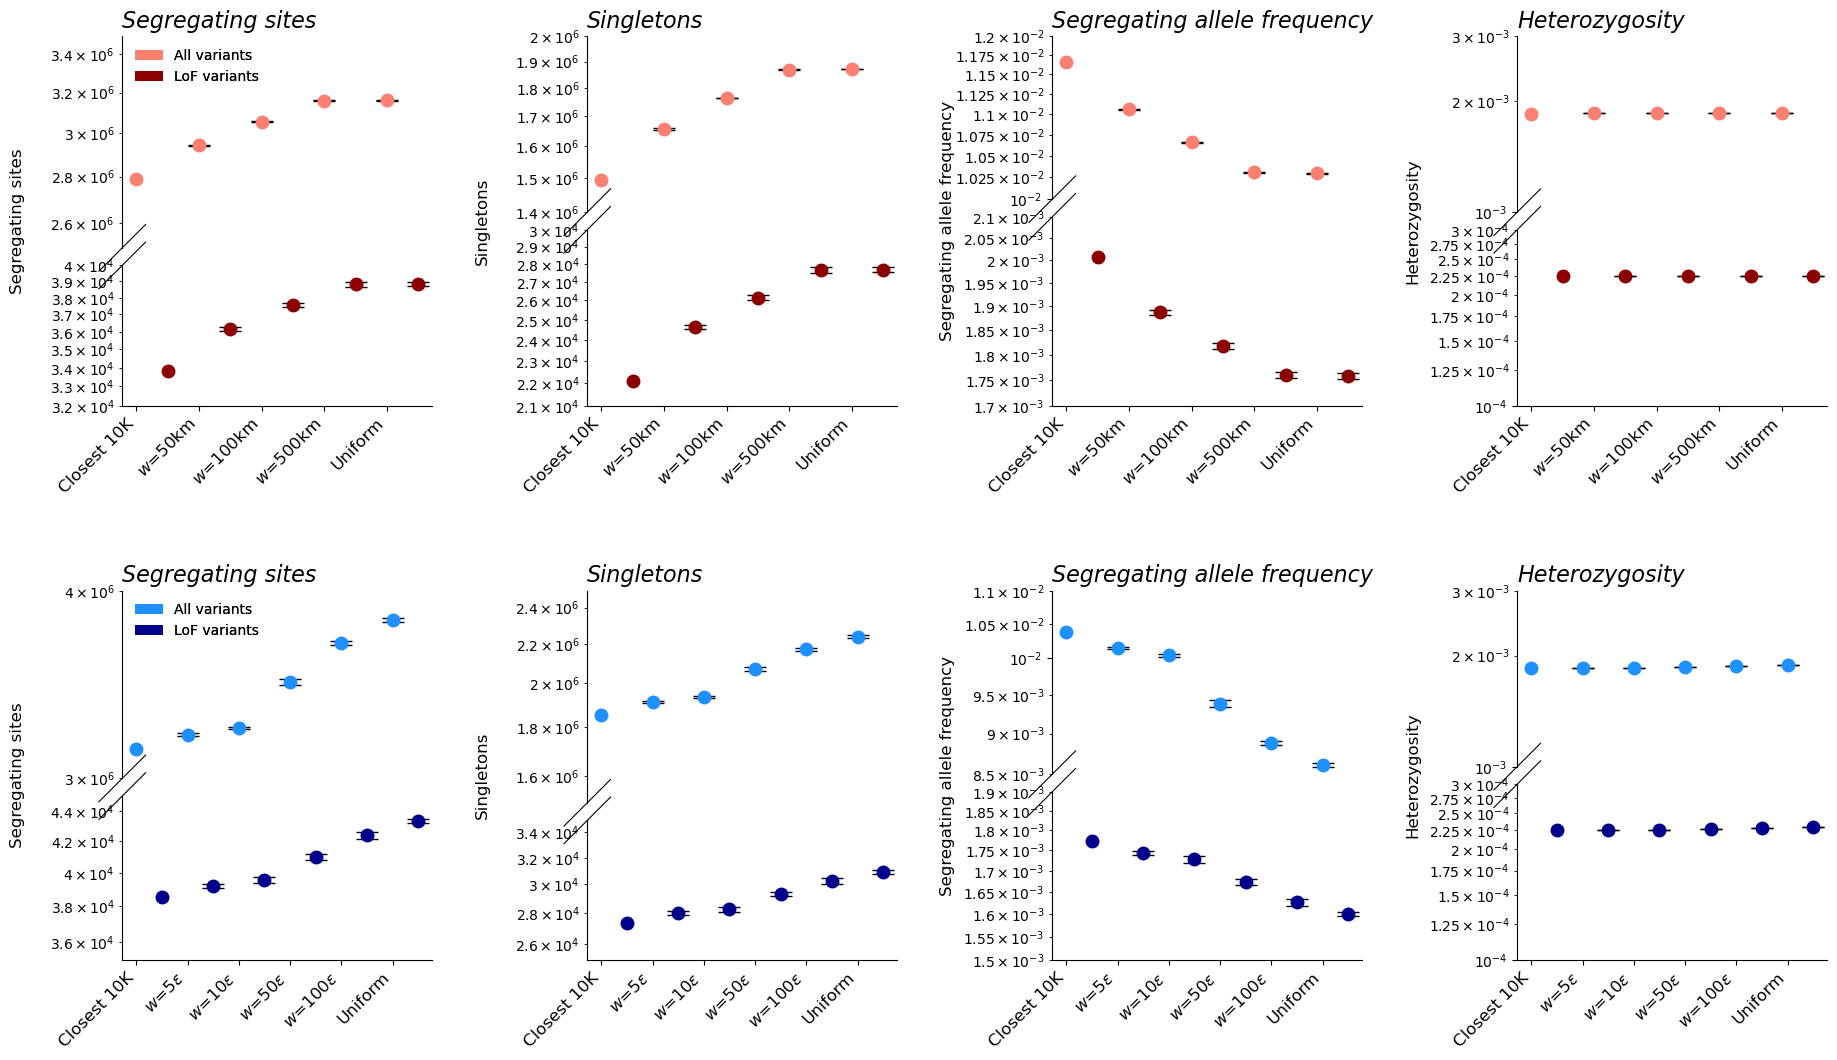

In [71]:
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch

colors = ['#1E90FF', '#00008B']
colors2 = ['salmon','darkred']

fig = plt.figure(figsize=(22, 12))
gs = GridSpec(2, 4, figure=fig,hspace=0.5,wspace=0.5)

bax1 = brokenaxes(ylims=((3.5e4, 4.5e4), (3e6, 4e6)), subplot_spec=gs[1, 0],yscale='log',hspace=0.1,xscale='linear')
bax2 = brokenaxes(ylims=((2.5e4, 3.5e4), (1.5e6, 2.5e6)), subplot_spec=gs[1, 1],yscale='log',hspace=0.1,xscale='linear')
bax3 = brokenaxes(ylims=((1.5e-3, 1.9e-3), (8.5e-3, 1.1e-2)), subplot_spec=gs[1, 2],yscale='log',hspace=0.1,xscale='linear')
bax4 = brokenaxes(ylims=((1e-4,3e-4), (1e-3, 3e-3)), subplot_spec=gs[1, 3],yscale='log',hspace=0.1,xscale='linear')

bax5 = brokenaxes(ylims=((3.2e4, 4e4), (2.5e6, 3.5e6)), subplot_spec=gs[0, 0],yscale='log',hspace=0.1,xscale='linear')
bax6 = brokenaxes(ylims=((2.1e4, 3e4), (1.4e6, 2e6)), subplot_spec=gs[0, 1],yscale='log',hspace=0.1,xscale='linear')
bax7 = brokenaxes(ylims=((1.7e-3, 2.1e-3), (1e-2, 1.2e-2)), subplot_spec=gs[0, 2],yscale='log',hspace=0.1,xscale='linear')
bax8 = brokenaxes(ylims=((1e-4,3e-4), (1e-3, 3e-3)), subplot_spec=gs[0, 3],yscale='log',hspace=0.1,xscale='linear')


for i in range(len(labs_wlof)):
    color = colors[i % 2] 
    color2 = colors2[i % 2] 
    if i < 2:
        bax1.plot(labs_wlof[i], ss_wlof[i], 'o', color=color, markersize=9)
    else:
        bax1.errorbar(labs_wlof[i], ss_wlof[i], yerr=ss_std_wlof[i], fmt='o', color=color, ecolor='black', capsize=8, markersize=9)

    if i < 2:
        bax2.plot(labs_wlof[i], sing_wlof[i], 'o', color=color, markersize=9)
    else:
        bax2.errorbar(labs_wlof[i], sing_wlof[i], yerr=sing_std_wlof[i], fmt='o', color=color, ecolor='black', capsize=8, markersize=9)

    if i < 2:
        bax3.plot(labs_wlof[i], af_wlof[i], 'o', color=color, markersize=9)
    else:
        bax3.errorbar(labs_wlof[i], af_wlof[i], yerr=af_std_wlof[i], fmt='o', color=color, ecolor='black', capsize=8, markersize=9)
    if i < 2:
        bax4.plot(labs_wlof[i], het_wlof[i], 'o', color=color, markersize=9)
    else:
        bax4.errorbar(labs_wlof[i], het_wlof[i], yerr=het_std_wlof[i], fmt='o', color=color, ecolor='black', capsize=8, markersize=9)

    if i<len(labs_wlof_geo):
        if i < 2:
            bax5.plot(labs_wlof_geo[i], ss_wlof_geo[i], 'o', color=color2, markersize=9)
        else:
            bax5.errorbar(labs_wlof_geo[i], ss_wlof_geo[i], yerr=ss_std_wlof_geo[i], fmt='o', color=color2, ecolor='black', capsize=8, markersize=9)
    
        if i < 2:
            bax6.plot(labs_wlof_geo[i], sing_wlof_geo[i], 'o', color=color2, markersize=9)
        else:
            bax6.errorbar(labs_wlof_geo[i], sing_wlof_geo[i], yerr=sing_std_wlof_geo[i], fmt='o', color=color2, ecolor='black', capsize=8, markersize=9)
    
        if i < 2:
            bax7.plot(labs_wlof_geo[i], af_wlof_geo[i], 'o', color=color2, markersize=9)
        else:
            bax7.errorbar(labs_wlof_geo[i], af_wlof_geo[i], yerr=af_std_wlof_geo[i], fmt='o', color=color2, ecolor='black', capsize=8, markersize=9)
        if i < 2:
            bax8.plot(labs_wlof_geo[i], het_wlof_geo[i], 'o', color=color2, markersize=9)
        else:
            bax8.errorbar(labs_wlof_geo[i], het_wlof_geo[i], yerr=het_std_wlof_geo[i], fmt='o', color=color2, ecolor='black', capsize=8, markersize=9)

bax1.set_yscale('log')
bax1.set_ylabel('Segregating sites',labelpad=70,fontsize=12)
bax1.set_title('Segregating sites', loc='left', fontstyle='italic', fontsize=16)

bax2.set_yscale('log')
bax2.set_ylabel('Singletons',labelpad=70,fontsize=12)
bax2.set_title('Singletons', loc='left', fontstyle='italic', fontsize=16)

bax3.set_yscale('log')
bax3.set_ylabel('Segregating allele frequency',labelpad=70,fontsize=12)
bax3.set_title('Segregating allele frequency', loc='left', fontstyle='italic', fontsize=16)

bax4.set_yscale('log')
bax4.set_ylabel('Heterozygosity',labelpad=70,fontsize=12)
bax4.set_title('Heterozygosity', loc='left', fontstyle='italic', fontsize=16)

bax5.set_yscale('log')
bax5.set_ylabel('Segregating sites',labelpad=70,fontsize=12)
bax5.set_title('Segregating sites', loc='left', fontstyle='italic', fontsize=16)

bax6.set_yscale('log')
bax6.set_ylabel('Singletons',labelpad=70,fontsize=12)
bax6.set_title('Singletons', loc='left', fontstyle='italic', fontsize=16)

bax7.set_yscale('log')
bax7.set_ylabel('Segregating allele frequency',labelpad=70,fontsize=12)
bax7.set_title('Segregating allele frequency', loc='left', fontstyle='italic', fontsize=16)

bax8.set_yscale('log')
bax8.set_ylabel('Heterozygosity',labelpad=70,fontsize=12)
bax8.set_title('Heterozygosity', loc='left', fontstyle='italic', fontsize=16)


labs = ['Closest 10K','Closest 10K',
 '$w$=5$\\varepsilon$',
 '$w$=10$\\varepsilon$',
 '$w$=50$\\varepsilon$',
 '$w$=100$\\varepsilon$',
 'Uniform']

labs_geo = ['Closest 10K','Closest 10K',
 '$w$=50km',
 '$w$=100km',
 '$w$=500km',
 'Uniform']
custom_ticks = [i for i in range(1, len(labs_wlof), 2)]
bax1.set_xticks(custom_ticks)
bax1.set_xticklabels(labs, rotation=45, ha='right',fontsize=12)
bax2.set_xticks(custom_ticks)
bax2.set_xticklabels(labs, rotation=45, ha='right',fontsize=12)
bax3.set_xticks(custom_ticks)
bax3.set_xticklabels(labs, rotation=45, ha='right',fontsize=12)
bax4.set_xticks(custom_ticks)
bax4.set_xticklabels(labs, rotation=45, ha='right',fontsize=12)

custom_ticks = [i for i in range(1, len(labs_wlof_geo), 2)]
bax5.set_xticks(custom_ticks)
bax5.set_xticklabels(labs_geo, rotation=45, ha='right',fontsize=12)
bax6.set_xticks(custom_ticks)
bax6.set_xticklabels(labs_geo, rotation=45, ha='right',fontsize=12)
bax7.set_xticks(custom_ticks)
bax7.set_xticklabels(labs_geo, rotation=45, ha='right',fontsize=12)
bax8.set_xticks(custom_ticks)
bax8.set_xticklabels(labs_geo, rotation=45, ha='right',fontsize=12)
# # Add legends
elements = [Patch(facecolor=colors[0], edgecolor='None', label='All variants'),
            Patch(facecolor=colors[1], edgecolor='None', label='LoF variants')]
leg1 = bax1.axs[0].legend(handles=elements,frameon=False,loc='upper left')
bax1.axs[0].add_artist(leg1)

elements = [Patch(facecolor=colors2[0], edgecolor='None', label='All variants'),
            Patch(facecolor=colors2[1], edgecolor='None', label='LoF variants')]
leg1 = bax5.axs[0].legend(handles=elements,frameon=False,loc='upper left')
bax5.axs[0].add_artist(leg1)

# plt.tight_layout()
plt.savefig('sumstats_lof_IS.pdf')
plt.show()


In [346]:
labs_geo

['Closest 10K',
 'Within 5$\\varepsilon_{Geo}$',
 'Within 10$\\varepsilon_{Geo}$',
 'Within 50$\\varepsilon_{Geo}$',
 'Uniform']

In [165]:
# !pip install brokenaxes
# custom_ticks
ss_wlof

[3138214.0,
 38579.0,
 3198948.9,
 39202.2,
 3231939.2,
 39462.0,
 3346367.2,
 40172.3,
 3603754.2,
 41820.7,
 3822710.2,
 43198.9]

In [128]:
labs

['Closest 10K',
 'Within 5$\\varepsilon_{PCA}$',
 'Within 10$\\varepsilon_{PCA}$',
 'Within 50$\\varepsilon_{PCA}$',
 'Within 100$\\varepsilon_{PCA}$',
 'Uniform']

In [72]:
# fig = plt.figure(figsize=(12,7))

# gs = gridspec.GridSpec(2, 1, height_ratios=[1,1.2])

# gs_top = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs[0])
# ax1 = fig.add_subplot(gs_top[0])
# ax2 = fig.add_subplot(gs_top[1])
# ax3 = fig.add_subplot(gs_top[2])
# ax4 = fig.add_subplot(gs_top[3])
# # ax5 = fig.add_subplot(gs_top[4])

# gs_bottom = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs[1])
# ax5 = fig.add_subplot(gs_bottom[0])
# ax6 = fig.add_subplot(gs_bottom[1])
# ax7 = fig.add_subplot(gs_bottom[2])
# ax8 = fig.add_subplot(gs_bottom[3])

# # gs_top2 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[2])
# # ax8 = fig.add_subplot(gs_top2[0],aspect='equal')
# # ax9 = fig.add_subplot(gs_top2[1],aspect='equal')
# # ax10 = fig.add_subplot(gs_top2[2],aspect='equal')

# # gs_bottom2 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[3])
# # ax11 = fig.add_subplot(gs_bottom2[0])
# # ax12 = fig.add_subplot(gs_bottom2[1])
# # ax13 = fig.add_subplot(gs_bottom2[2])

# # ax4 = fig.add_subplot(gs_top[3])
# # meta_sub = metadata[metadata['closest_10k_pca']==False]
# # ax1.scatter(meta_sub['PC1'],meta_sub['PC2'],s=0.1,c='lightgray')
# # meta_sub = metadata[metadata['closest_10k_pca']==True]
# # ax1.scatter(meta_sub['PC1'],meta_sub['PC2'],s=0.1,c='steelblue')
# # ax1.set_xticks([])
# # ax1.set_yticks([])
# # ax1.set_xticklabels([])
# # ax1.set_yticklabels([])
# # ax1.set_ylabel('PC1')
# # ax1.set_xlabel('PC2')
# # ax1.set_title('Closest 10,000',loc='left')

# meta_sub = metadata[metadata['within_5epsilon_pca']==False]
# ax1.scatter(meta_sub['PC1'],meta_sub['PC2'],s=0.1,c='lightgray')
# meta_sub = metadata[metadata['within_5epsilon_pca']==True]
# ax1.scatter(meta_sub['PC1'],meta_sub['PC2'],s=0.1,c='steelblue')
# ax1.set_xticks([])
# ax1.set_yticks([])
# ax1.set_xticklabels([])
# ax1.set_yticklabels([])
# ax1.set_ylabel('PC1')
# ax1.set_xlabel('PC2')
# ax1.set_title(r'Within 5$\varepsilon_{PCA}$',loc='left')

# meta_sub = metadata[metadata['within_10epsilon_pca']==False]
# ax2.scatter(meta_sub['PC1'],meta_sub['PC2'],s=0.1,c='lightgray')
# meta_sub = metadata[metadata['within_10epsilon_pca']==True]
# ax2.scatter(meta_sub['PC1'],meta_sub['PC2'],s=0.1,c='steelblue')
# ax2.set_xticks([])
# ax2.set_yticks([])
# ax2.set_xticklabels([])
# ax2.set_yticklabels([])
# ax2.set_ylabel('PC1')
# ax2.set_xlabel('PC2')
# ax2.set_title(r'Within 10$\varepsilon_{PCA}$',loc='left')

# meta_sub = metadata[metadata['within_50epsilon_pca']==False]
# ax3.scatter(meta_sub['PC1'],meta_sub['PC2'],s=0.1,c='lightgray')
# meta_sub = metadata[metadata['within_50epsilon_pca']==True]
# ax3.scatter(meta_sub['PC1'],meta_sub['PC2'],s=0.1,c='steelblue')
# ax3.set_xticks([])
# ax3.set_yticks([])
# ax3.set_xticklabels([])
# ax3.set_yticklabels([])
# ax3.set_ylabel('PC1')
# ax3.set_xlabel('PC2')
# ax3.set_title(r'Within 50$\varepsilon_{PCA}$',loc='left')

# meta_sub = metadata[metadata['within_100epsilon_pca']==False]
# ax4.scatter(meta_sub['PC1'],meta_sub['PC2'],s=0.1,c='lightgray')
# meta_sub = metadata[metadata['within_100epsilon_pca']==True]
# ax4.scatter(meta_sub['PC1'],meta_sub['PC2'],s=0.1,c='steelblue')
# ax4.set_xticks([])
# ax4.set_yticks([])
# ax4.set_xticklabels([])
# ax4.set_yticklabels([])
# ax4.set_ylabel('PC1')
# ax4.set_xlabel('PC2')
# ax4.set_title(r'Within 100$\varepsilon_{PCA}$',loc='left')

# bars = ax5.bar(labs[0],ss[0],color='steelblue')
# bars = ax5.bar(labs[1:],ss[1:],yerr=ss_std[1:],capsize=5,color='steelblue',ecolor='black')
# ax5.set_xticks(labs)
# ax5.set_xticklabels(labs, rotation=45, ha='right')
# ax5.set_ylabel('Segregating sites')
# ax5.set_title('Segregating sites',loc='left')
# ax5.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1e}'))

# bars = ax6.bar(labs[0],sing[0],color='steelblue')
# bars = ax6.bar(labs[1:],sing[1:],yerr=sing_std[1:],capsize=5,color='steelblue',ecolor='black')
# ax6.set_xticks(labs)
# ax6.set_xticklabels(labs, rotation=45, ha='right')
# ax6.set_ylabel('Singletons')
# ax6.set_title('Singletons',loc='left')
# ax6.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1e}'))

# bars = ax7.bar(labs[0],af[0],color='steelblue',ecolor='black')
# bars = ax7.bar(labs[1:],af[1:],yerr=af_std[1:],capsize=5,color='steelblue',ecolor='black')
# ax7.set_xticks(labs)
# ax7.set_xticklabels(labs, rotation=45, ha='right')
# ax7.set_ylabel('Segregating allele frequency')
# ax7.set_title('Segregating allele frequency',loc='left')
# ax7.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1e}'))

# bars = ax8.bar(labs[0],het[0],color='steelblue',ecolor='black')
# bars = ax8.bar(labs[1:],het[1:],yerr=het_std[1:],capsize=5,color='steelblue',ecolor='black')
# ax8.set_xticks(labs)
# ax8.set_xticklabels(labs, rotation=45, ha='right')
# ax8.set_ylabel('Heterozygosity')
# ax8.set_title('Heterozygosity',loc='left')
# ax8.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1e}'))
# # ax8.set_ylim(1e-3,1e-2)

# ax1.text(-0.5, 1.04, 'A', transform=ax1.transAxes, 
#          fontsize=18, fontweight='bold', ha='center')
# ax5.text(-0.38, 1.04, 'B', transform=ax5.transAxes, 
#          fontsize=18, fontweight='bold', ha='center')

# plt.subplots_adjust(wspace=0.4,hspace=0.6)
# plt.tight_layout()
# # plt.show()
# plt.savefig('ukb_summary_pca.png')

In [413]:
# # stats_unif = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/uniform_n10000.tsv',delimiter='\t')
# stats_10k = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/closest10kgeo_n10000.tsv',delimiter='\t')
# stats_5eps = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/5epsilongeo_n10000.tsv',delimiter='\t')
# stats_10eps = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/10epsilongeo_n10000.tsv',delimiter='\t')
# stats_50eps = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/50epsilongeo_n10000.tsv',delimiter='\t')
# uniform = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/uniformgeo_n10000.tsv',delimiter='\t')
# # stats_100eps = pd.read_csv('../empirical/subsampling_vF/results/sum_stats/100epsilonpca_n10000.tsv',delimiter='\t')

# ss = []
# ss_std = []
# ac = []
# ac_std = []
# sing = []
# sing_std = []
# for df in [stats_10k,stats_5eps,stats_10eps,stats_50eps,uniform]:#,stats_100eps,stats_unif]:
#     ss.append(df['segsites'].mean())
#     ss_std.append(df['segsites'].std())
#     ac.append(df['seg_ac_mean'].mean())
#     ac_std.append(df['seg_ac_mean'].std())
#     sing.append(df['singletons'].mean())
#     sing_std.append(df['singletons'].std())

# labs = ['Closest 10K',r'Within 5$\varepsilon_{Geo}$',r'Within 10$\varepsilon_{Geo}$',r'Within 50$\varepsilon_{Geo}$','Uniform']#,r'Within 100$\varepsilon_{PCA}$','Uniform']

In [73]:
# fig = plt.figure(figsize=(12,7))

# gs = gridspec.GridSpec(2, 1, height_ratios=[1,1.2])

# gs_top = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[0])
# ax1 = fig.add_subplot(gs_top[0],aspect='equal')
# ax2 = fig.add_subplot(gs_top[1],aspect='equal')
# ax3 = fig.add_subplot(gs_top[2],aspect='equal')
# # ax4 = fig.add_subplot(gs_top[3])
# # ax5 = fig.add_subplot(gs_top[4])

# gs_bottom = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[1])
# ax5 = fig.add_subplot(gs_bottom[0])
# ax6 = fig.add_subplot(gs_bottom[1])
# ax7 = fig.add_subplot(gs_bottom[2])


# meta_sub = metadata[metadata['within_5epsilon_geo']==False]
# ax1.scatter(meta_sub['birth_east_coord'],meta_sub['birth_north_coord'],s=0.1,c='lightgray')
# meta_sub = metadata[metadata['within_5epsilon_geo']==True]
# ax1.scatter(meta_sub['birth_east_coord'],meta_sub['birth_north_coord'],s=0.1,c='orchid')
# ax1.set_xticks([])
# ax1.set_yticks([])
# ax1.set_xticklabels([])
# ax1.set_yticklabels([])
# ax1.set_ylabel('North Coordinate')
# ax1.set_xlabel('East Coordinate')
# ax1.set_title(r'Within 5$\varepsilon_{Geo}$',loc='left')

# meta_sub = metadata[metadata['within_10epsilon_geo']==False]
# ax2.scatter(meta_sub['birth_east_coord'],meta_sub['birth_north_coord'],s=0.1,c='lightgray')
# meta_sub = metadata[metadata['within_10epsilon_geo']==True]
# ax2.scatter(meta_sub['birth_east_coord'],meta_sub['birth_north_coord'],s=0.1,c='orchid')
# ax2.set_xticks([])
# ax2.set_yticks([])
# ax2.set_xticklabels([])
# ax2.set_yticklabels([])
# ax2.set_ylabel('North Coordinate')
# ax2.set_xlabel('East Coordinate')
# ax2.set_title(r'Within 10$\varepsilon_{Geo}$',loc='left')

# meta_sub = metadata[metadata['within_50epsilon_geo']==False]
# ax3.scatter(meta_sub['birth_east_coord'],meta_sub['birth_north_coord'],s=0.1,c='lightgray')
# meta_sub = metadata[metadata['within_50epsilon_geo']==True]
# ax3.scatter(meta_sub['birth_east_coord'],meta_sub['birth_north_coord'],s=0.1,c='orchid')
# ax3.set_xticks([])
# ax3.set_yticks([])
# ax3.set_xticklabels([])
# ax3.set_yticklabels([])
# ax3.set_ylabel('North Coordinate')
# ax3.set_xlabel('East Coordinate')
# ax3.set_title(r'Within 50$\varepsilon_{Geo}$',loc='left')

# bars = ax5.bar(labs[0],ss[0],color='orchid')
# bars = ax5.bar(labs[1:],ss[1:],yerr=ss_std[1:],capsize=5,color='orchid',ecolor='black')
# ax5.set_xticks(labs)
# ax5.set_xticklabels(labs, rotation=45, ha='right')
# ax5.set_ylabel('Segregating sites')
# ax5.set_title('Segregating sites',loc='left')
# ax5.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1e}'))

# bars = ax6.bar(labs[0],sing[0],color='orchid')
# bars = ax6.bar(labs[1:],sing[1:],yerr=sing_std[1:],capsize=5,color='orchid',ecolor='black')
# ax6.set_xticks(labs)
# ax6.set_xticklabels(labs, rotation=45, ha='right')
# ax6.set_ylabel('Singletons')
# ax6.set_title('Singletons',loc='left')
# ax6.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1e}'))

# n=10000
# bars = ax7.bar(labs[0],ac[0]/n,color='orchid')
# bars = ax7.bar(labs[1:],[x/n for x in ac[1:]],yerr=[y/n for y in ac_std[1:]],capsize=5,color='orchid',ecolor='black')
# ax7.set_xticks(labs)
# ax7.set_xticklabels(labs, rotation=45, ha='right')
# ax7.set_ylabel('Segregating allele frequency')
# ax7.set_title('Segregating allele frequency',loc='left')
# ax7.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1e}'))

# ax1.text(-1.74, 1.04, 'A', transform=ax1.transAxes, 
#          fontsize=18, fontweight='bold', ha='center')
# ax5.text(-0.38, 1.04, 'B', transform=ax5.transAxes, 
#          fontsize=18, fontweight='bold', ha='center')

# plt.subplots_adjust(wspace=0.4,hspace=0.6)
# plt.tight_layout()
# # plt.show()
# plt.savefig('ukb_summary_geo.png')



In [93]:
sfs_unif = pd.read_csv('../empirical/subsampling_vF/results/sfs/uniformpcaIS_n10000_all.tsv',delimiter='\t')
sfs_10k = pd.read_csv('../empirical/subsampling_vF/results/sfs/closest10kpca_n10000_all.tsv',delimiter='\t')
sfs_5eps = pd.read_csv('../empirical/subsampling_vF/results/sfs/5epsilonpcaIS_n10000_all.tsv',delimiter='\t')
sfs_10eps = pd.read_csv('../empirical/subsampling_vF/results/sfs/10epsilonpcaIS_n10000_all.tsv',delimiter='\t')
sfs_50eps = pd.read_csv('../empirical/subsampling_vF/results/sfs/50epsilonpcaIS_n10000_all.tsv',delimiter='\t')
sfs_100eps = pd.read_csv('../empirical/subsampling_vF/results/sfs/100epsilonpcaIS_n10000_all.tsv',delimiter='\t')

sfs_unif_LoF = pd.read_csv('../empirical/subsampling_vF/results/sfs/uniformpcaIS_n10000_LoF.tsv',delimiter='\t')
sfs_10k_LoF = pd.read_csv('../empirical/subsampling_vF/results/sfs/closest10kpca_n10000_LoF.tsv',delimiter='\t')
sfs_5eps_LoF = pd.read_csv('../empirical/subsampling_vF/results/sfs/5epsilonpcaIS_n10000_LoF.tsv',delimiter='\t')
sfs_10eps_LoF = pd.read_csv('../empirical/subsampling_vF/results/sfs/10epsilonpcaIS_n10000_LoF.tsv',delimiter='\t')
sfs_50eps_LoF = pd.read_csv('../empirical/subsampling_vF/results/sfs/50epsilonpcaIS_n10000_LoF.tsv',delimiter='\t')
sfs_100eps_LoF = pd.read_csv('../empirical/subsampling_vF/results/sfs/100epsilonpcaIS_n10000_LoF.tsv',delimiter='\t')


In [76]:
sfs_unif

,seed,0,1,2,3,4,5,6,7,8,...,991,992,993,994,995,996,997,998,999,1000
0,3,22460093,2280101,523673,226506,127915,83266,59757,45172,36336,...,44,46,38,44,48,32,30,41,47,52
1,10,22453584,2274937,523521,227371,128370,83410,59883,45509,36274,...,48,53,46,46,37,46,42,39,46,38
2,7,22467208,2278386,520611,224535,126688,83375,59291,44919,35470,...,39,45,43,37,34,31,36,41,58,42
3,6,22449875,2282593,524139,226235,127703,83814,59904,45448,36128,...,26,43,36,53,38,55,35,36,36,50
4,2,22434916,2290445,524510,226693,128647,83744,59857,45174,35982,...,35,40,47,44,49,34,38,50,49,42
5,1,22465840,2276775,521113,224483,127474,83723,59040,45044,35525,...,43,40,35,34,37,40,43,49,39,43
6,9,22463396,2272682,521213,224880,127288,83731,60230,45065,35949,...,44,45,34,43,42,38,44,35,46,43
7,4,22469648,2275220,524367,226565,128543,83171,60200,45170,35674,...,41,46,48,34,42,39,44,45,49,34
8,5,22457848,2276516,523191,225696,128135,83348,60135,45755,35916,...,47,34,35,52,46,47,38,42,37,39
9,8,22478845,2266178,521778,225292,127603,82834,59413,45388,35839,...,48,40,43,49,34,42,41,48,50,47


In [77]:
sfs_unif.iloc[:,1:].mean(axis=0)

0       22460125.3
1        2277383.3
2         522811.6
3         225825.6
4         127836.6
           ...    
996           40.4
997           39.1
998           42.6
999           45.7
1000          43.0
Length: 1001, dtype: float64

In [78]:
sfs_unif.iloc[:,1:].std()

0       12125.190024
1        6373.449616
2        1483.492815
3         998.989289
4         610.973213
            ...     
996         7.441625
997         4.557046
998         5.274677
999         6.733828
1000        5.477226
Length: 1001, dtype: float64

In [79]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b','gray']


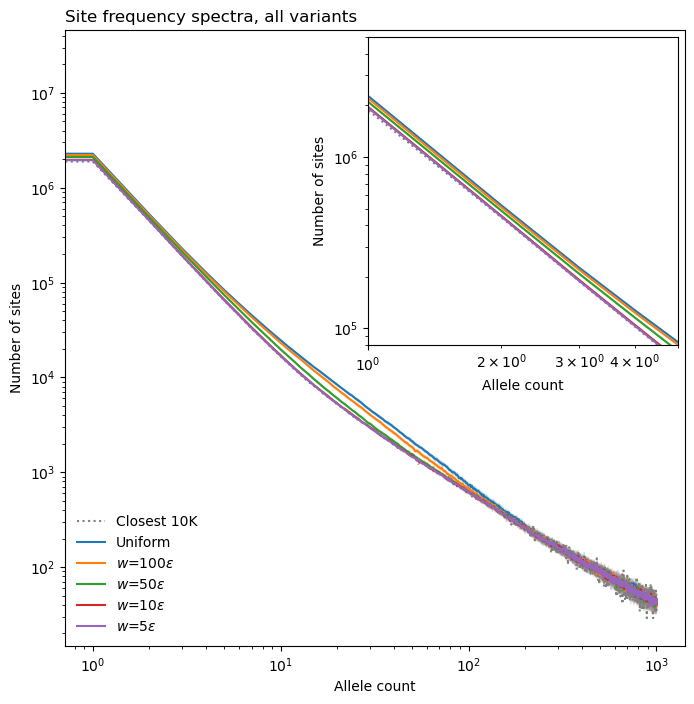

In [94]:
fig, ax = plt.subplots(figsize=(8,8))

axins = inset_axes(ax, width='50%', height='50%', loc='upper right')

sfs_avg = sfs_10k.iloc[:,1:].mean(axis=0)
sfs_std = sfs_10k.iloc[:,1:].std()
ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[6],label=r'Closest 10K',linestyle='dotted',alpha=1)
# ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[6],alpha=0.2)
axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[6],label=r'Closest 10K$',linestyle='dotted',alpha=1)
# axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[6],alpha=0.2)

sfs_avg = sfs_unif.iloc[:,1:].mean(axis=0)
sfs_std = sfs_unif.iloc[:,1:].std()
ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[0],label='Uniform')
ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[0],alpha=0.2)
axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[0],label='Uniform')
axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[0],alpha=0.2)

sfs_avg = sfs_100eps.iloc[:,1:].mean(axis=0)
sfs_std = sfs_100eps.iloc[:,1:].std()
ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[1],label=r'$w$=100$\varepsilon$')
ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[1],alpha=0.2)
axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[1],label=r'$w$=100$\varepsilon')
axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[1],alpha=0.2)

sfs_avg = sfs_50eps.iloc[:,1:].mean(axis=0)
sfs_std = sfs_50eps.iloc[:,1:].std()
ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[2],label=r'$w$=50$\varepsilon$')
ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[2],alpha=0.2)
axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[2],label=r'$w$=50$\varepsilon$')
axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[2],alpha=0.2)


sfs_avg = sfs_10eps.iloc[:,1:].mean(axis=0)
sfs_std = sfs_10eps.iloc[:,1:].std()
ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[3],label=r'$w$=10$\varepsilon$')
ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[3],alpha=0.2)
axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[3],label=r'$w$=10$\varepsilon$')
axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[3],alpha=0.2)


sfs_avg = sfs_5eps.iloc[:,1:].mean(axis=0)
sfs_std = sfs_5eps.iloc[:,1:].std()
ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[4],label=r'$w$=5$\varepsilon$')
ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[4],alpha=0.2)
axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[4],label=r'$w$=5$\varepsilon$')
axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[4],alpha=0.2)


# sfs_avg = sfs_10k.iloc[:,1:].mean(axis=0)
# axs[0,0].plot(np.arange(len(sfs_avg)),sfs_avg,color='black',label=r'Closest 10K',linestyle='dotted')
# axs[0,0].fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[5],alpha=0.2)

ax.legend(frameon=False,loc='lower left')
axins.set_xlim(1,5)
axins.set_ylim(8e4,5e6)
ax.set_xscale('log')
ax.set_yscale('log')
axins.set_xscale('log')
axins.set_yscale('log')

ax.set_xlabel('Allele count')
ax.set_ylabel('Number of sites')

axins.set_xlabel('Allele count')
axins.set_ylabel('Number of sites')
ax.set_title('Site frequency spectra, all variants', loc='left')

plt.savefig('sfs_ukb_pca_all_IS.pdf')

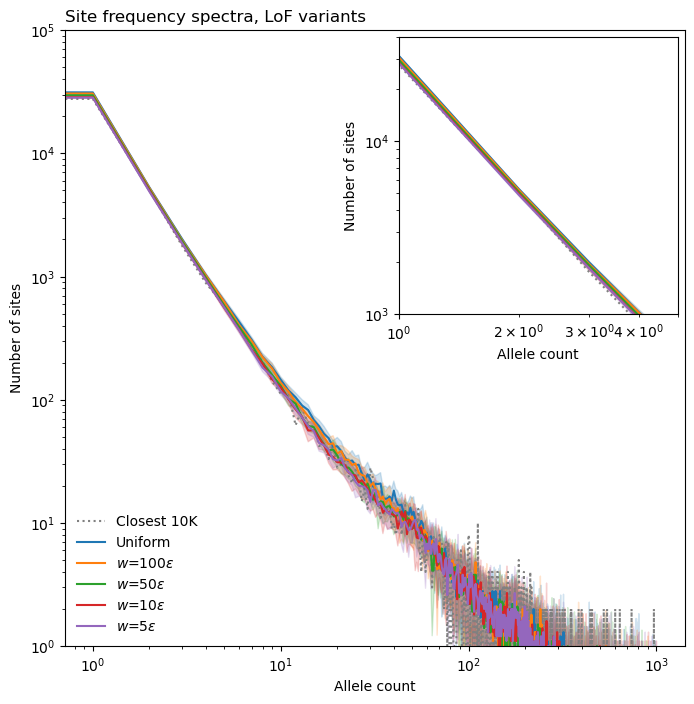

In [95]:
fig, ax = plt.subplots(figsize=(8,8))

axins = inset_axes(ax, width='45%', height='45%', loc='upper right')

sfs_avg = sfs_10k_LoF.iloc[:,1:].mean(axis=0)
sfs_std = sfs_10k_LoF.iloc[:,1:].std()
ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[6],label=r'Closest 10K',linestyle='dotted',alpha=1)
# ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[6],alpha=0.2)
axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[6],label=r'Closest 10K$',linestyle='dotted',alpha=1)
# axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[6],alpha=0.2)

sfs_avg = sfs_unif_LoF.iloc[:,1:].mean(axis=0)
sfs_std = sfs_unif_LoF.iloc[:,1:].std()
ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[0],label='Uniform')
ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[0],alpha=0.2)
axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[0],label='Uniform')
axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[0],alpha=0.2)

sfs_avg = sfs_100eps_LoF.iloc[:,1:].mean(axis=0)
sfs_std = sfs_100eps_LoF.iloc[:,1:].std()
ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[1],label=r'$w$=100$\varepsilon$')
ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[1],alpha=0.2)
axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[1],label=r'$w$=100$\varepsilon$')
axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[1],alpha=0.2)

sfs_avg = sfs_50eps_LoF.iloc[:,1:].mean(axis=0)
sfs_std = sfs_50eps_LoF.iloc[:,1:].std()
ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[2],label=r'$w$=50$\varepsilon$')
ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[2],alpha=0.2)
axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[2],label=r'$w$=50$\varepsilon$')
axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[2],alpha=0.2)


sfs_avg = sfs_10eps_LoF.iloc[:,1:].mean(axis=0)
sfs_std = sfs_10eps_LoF.iloc[:,1:].std()
ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[3],label=r'$w$=10$\varepsilon$')
ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[3],alpha=0.2)
axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[3],label=r'$w$=10$\varepsilon$')
axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[3],alpha=0.2)


sfs_avg = sfs_5eps_LoF.iloc[:,1:].mean(axis=0)
sfs_std = sfs_5eps_LoF.iloc[:,1:].std()
ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[4],label=r'$w$=5$\varepsilon$')
ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[4],alpha=0.2)
axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[4],label=r'$w$=5$\varepsilon$')
axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[4],alpha=0.2)


# sfs_avg = sfs_10k.iloc[:,1:].mean(axis=0)
# axs[0,0].plot(np.arange(len(sfs_avg)),sfs_avg,color='black',label=r'Closest 10K',linestyle='dotted')
# axs[0,0].fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[5],alpha=0.2)

ax.legend(frameon=False,loc='lower left')
axins.set_xlim(1,5)
axins.set_ylim(1e3,4e4)
ax.set_xscale('log')
ax.set_yscale('log')
axins.set_xscale('log')
axins.set_yscale('log')

ax.set_ylim(1e0,1e5)
ax.set_xlabel('Allele count')
ax.set_ylabel('Number of sites')

axins.set_xlabel('Allele count')
axins.set_ylabel('Number of sites')
ax.set_title('Site frequency spectra, LoF variants', loc='left')

plt.savefig('sfs_ukb_pca_lof_IS.pdf')

In [96]:
# sfs_10k = pd.read_csv('../empirical/subsampling_vF/results/sfs/closest10kgeo_n10000_all.tsv',delimiter='\t')
sfs_5eps = pd.read_csv('../empirical/subsampling_vF/results/sfs/5epsilongeoIS_n10000_all.tsv',delimiter='\t')
sfs_10eps = pd.read_csv('../empirical/subsampling_vF/results/sfs/10epsilongeoIS_n10000_all.tsv',delimiter='\t')
sfs_50eps = pd.read_csv('../empirical/subsampling_vF/results/sfs/50epsilongeoIS_n10000_all.tsv',delimiter='\t')
sfs_unif = pd.read_csv('../empirical/subsampling_vF/results/sfs/uniformgeoIS_n10000_all.tsv',delimiter='\t')
sfs_10k = pd.read_csv('../empirical/subsampling_vF/results/sfs/closest10kgeo_n10000_all.tsv',delimiter='\t')


# sfs_10k_LoF = pd.read_csv('../empirical/subsampling_vF/results/sfs/closest10kgeo_n10000_LoF.tsv',delimiter='\t')
sfs_5eps_LoF = pd.read_csv('../empirical/subsampling_vF/results/sfs/5epsilongeoIS_n10000_LoF.tsv',delimiter='\t')
sfs_10eps_LoF = pd.read_csv('../empirical/subsampling_vF/results/sfs/10epsilongeoIS_n10000_LoF.tsv',delimiter='\t')
sfs_50eps_LoF = pd.read_csv('../empirical/subsampling_vF/results/sfs/50epsilongeoIS_n10000_LoF.tsv',delimiter='\t')
sfs_unif_LoF = pd.read_csv('../empirical/subsampling_vF/results/sfs/uniformgeoIS_n10000_LoF.tsv',delimiter='\t')
sfs_10k_LoF = pd.read_csv('../empirical/subsampling_vF/results/sfs/closest10kgeo_n10000_LoF.tsv',delimiter='\t')


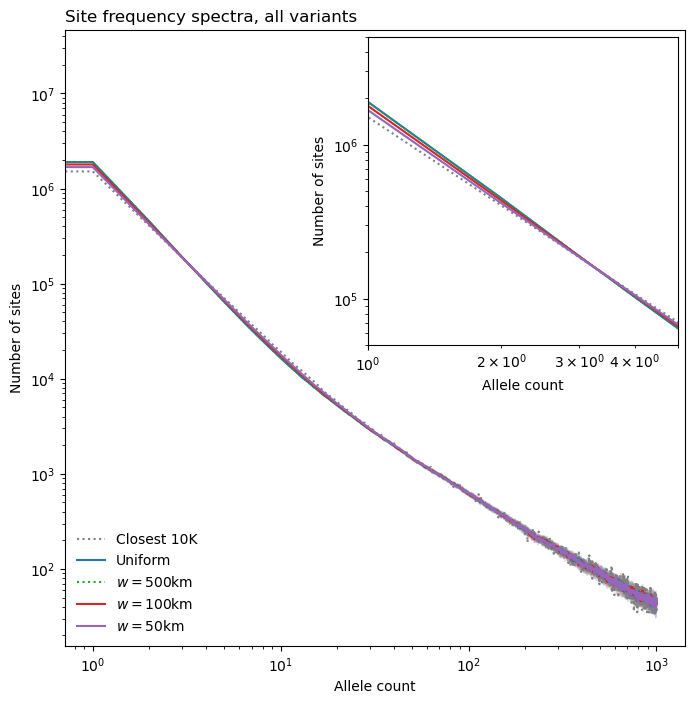

In [97]:
fig, ax = plt.subplots(figsize=(8,8))

axins = inset_axes(ax, width='50%', height='50%', loc='upper right')


# sfs_avg = sfs_100eps.iloc[:,1:].mean(axis=0)
# sfs_std = sfs_100eps.iloc[:,1:].std()
# ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[2],label=r'Within 100$\varepsilon_{PCA}$')
# ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[1],alpha=0.2)
# axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[2],label=r'Within 100$\varepsilon_{PCA}$')
# axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[1],alpha=0.2)


sfs_avg = sfs_10k.iloc[:,1:].mean(axis=0)
sfs_std = sfs_10k.iloc[:,1:].std()
ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[6],label=r'Closest 10K',linestyle='dotted',alpha=1)
# ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[1],alpha=0.2)
axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[6],label=r'Closest 10K',linestyle='dotted',alpha=1)
# axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[1],alpha=0.2)

sfs_avg = sfs_unif.iloc[:,1:].mean(axis=0)
sfs_std = sfs_unif.iloc[:,1:].std()
ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[0],label='Uniform')
ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[0],alpha=0.2)
axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[0],label='Uniform')
axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[0],alpha=0.2)

sfs_avg = sfs_50eps.iloc[:,1:].mean(axis=0)
sfs_std = sfs_50eps.iloc[:,1:].std()
ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[2],label=r'$w=$500km',linestyle='dotted')
ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[2],alpha=0.2)
axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[2],label=r'$w=$500km',linestyle='dotted')
axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[2],alpha=0.2)

sfs_avg = sfs_10eps.iloc[:,1:].mean(axis=0)
sfs_std = sfs_10eps.iloc[:,1:].std()
ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[3],label=r'$w=$100km')
ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[3],alpha=0.2)
axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[3],label=r'$w=$100km')
axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[3],alpha=0.2)

sfs_avg = sfs_5eps.iloc[:,1:].mean(axis=0)
sfs_std = sfs_5eps.iloc[:,1:].std()
ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[4],label=r'$w=$50km')
ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[4],alpha=0.2)
axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[4],label=r'$w=$50km')
axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[4],alpha=0.2)




ax.legend(frameon=False,loc='lower left')
axins.set_xlim(1,5)
axins.set_ylim(5e4,5e6)
ax.set_xscale('log')
ax.set_yscale('log')
axins.set_xscale('log')
axins.set_yscale('log')

ax.set_xlabel('Allele count')
ax.set_ylabel('Number of sites')

axins.set_xlabel('Allele count')
axins.set_ylabel('Number of sites')
ax.set_title('Site frequency spectra, all variants', loc='left')

plt.savefig('sfs_ukb_geo_all_IS.pdf')

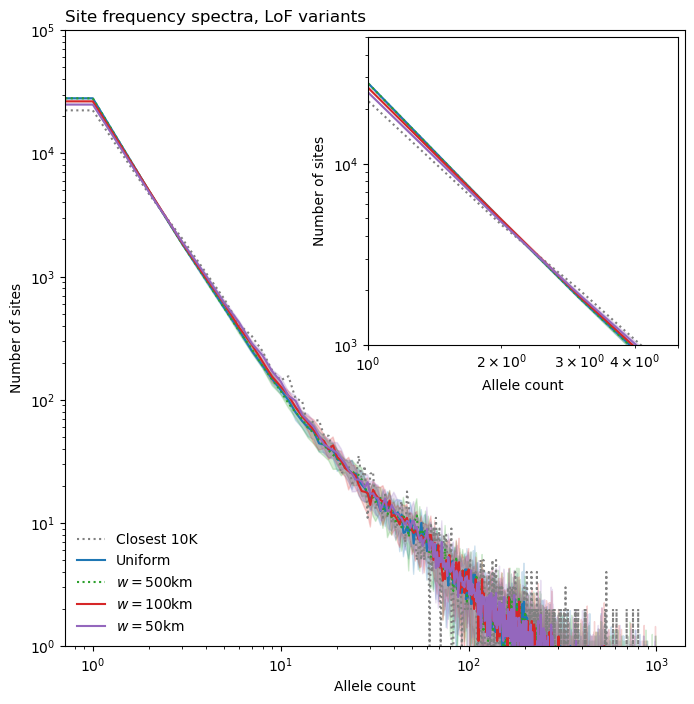

In [98]:
fig, ax = plt.subplots(figsize=(8,8))

axins = inset_axes(ax, width='50%', height='50%', loc='upper right')

# sfs_avg = sfs_unif.iloc[:,1:].mean(axis=0)
# sfs_std = sfs_unif.iloc[:,1:].std()
# ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[0],label='Uniform')
# ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[0],alpha=0.2)
# axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[0],label='Uniform')
# axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[0],alpha=0.2)

# sfs_avg = sfs_100eps_LoF.iloc[:,1:].mean(axis=0)
# sfs_std = sfs_100eps_LoF.iloc[:,1:].std()
# ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[2],label=r'Within 100$\varepsilon_{PCA}$')
# ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[1],alpha=0.2)
# axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[2],label=r'Within 100$\varepsilon_{PCA}$')
# axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[1],alpha=0.2)

sfs_avg = sfs_10k_LoF.iloc[:,1:].mean(axis=0)
sfs_std = sfs_10k_LoF.iloc[:,1:].std()
ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[6],label=r'Closest 10K',linestyle='dotted',alpha=1)
# ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[1],alpha=0.2)
axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[6],label=r'Closest 10K',linestyle='dotted',alpha=1)
# axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[1],alpha=0.2)

sfs_avg = sfs_unif_LoF.iloc[:,1:].mean(axis=0)
sfs_std = sfs_unif_LoF.iloc[:,1:].std()
ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[0],label='Uniform')
ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[0],alpha=0.2)
axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[0],label='Uniform')
axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[0],alpha=0.2)

sfs_avg = sfs_50eps_LoF.iloc[:,1:].mean(axis=0)
sfs_std = sfs_50eps_LoF.iloc[:,1:].std()
ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[2],label=r'$w=$500km',linestyle='dotted')
ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[2],alpha=0.2)
axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[2],label=r'$w=$500km',linestyle='dotted')
axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[2],alpha=0.2)

sfs_avg = sfs_10eps_LoF.iloc[:,1:].mean(axis=0)
sfs_std = sfs_10eps_LoF.iloc[:,1:].std()
ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[3],label=r'$w=$100km')
ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[3],alpha=0.2)
axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[3],label=r'$w=$100km')
axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[3],alpha=0.2)

sfs_avg = sfs_5eps_LoF.iloc[:,1:].mean(axis=0)
sfs_std = sfs_5eps_LoF.iloc[:,1:].std()
ax.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[4],label=r'$w=$50km')
ax.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[4],alpha=0.2)
axins.plot(np.arange(len(sfs_avg)),sfs_avg,color=colors[4],label=r'$w=$50km')
axins.fill_between(np.arange(len(sfs_avg)),sfs_avg-sfs_std,sfs_avg+sfs_std,color=colors[4],alpha=0.2)


ax.legend(frameon=False,loc='lower left')
axins.set_xlim(1,5)
axins.set_ylim(1e3,5e4)
ax.set_xscale('log')
ax.set_yscale('log')
axins.set_xscale('log')
axins.set_yscale('log')

ax.set_ylim(1e0,1e5)
ax.set_xlabel('Allele count')
ax.set_ylabel('Number of sites')

axins.set_xlabel('Allele count')
axins.set_ylabel('Number of sites')
ax.set_title('Site frequency spectra, LoF variants', loc='left')

plt.savefig('sfs_ukb_geo_lof_IS.pdf')